1. Use the foodprices.xlsx dataset (data:  average price in cents per pound by cities: year 1973) and do the following:
       1.1 Create a PCA model and identify the first 2 principal components. 
       1.2 Print the eigenvalues and loadings. 
       1.3 Describe how much PC1 and PC2 explain the variance in the data. 
       1.4 By writing a code similar to the following, generate a graph and interpret the meaning of PC1 and PC2.


In [104]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


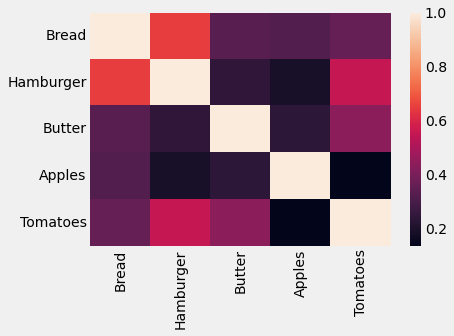

In [105]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df=pd.read_csv('/content/drive/MyDrive/DataMining/Files/foodprices.csv')

#see the corr matrix
cm=df.corr()
sns.heatmap(cm)

Bread and hamburger highly correlated, >0.5

In [106]:
df.head

<bound method NDFrame.head of              City  Bread  Hamburger  Butter  Apples  Tomatoes
0       Anchorage   70.9      135.6  155.00    63.9     100.1
1         Atlanta   36.4      111.5  144.30    53.9      95.9
2       Baltimore   28.9      108.8  151.00    47.5     104.5
3          Boston   43.2      119.3  142.00    41.1      96.5
4         Buffalo   34.5      109.9  124.80    35.6      75.9
5         Chicago   37.1      107.5  145.40    65.1      94.2
6      Cincinnati   37.1      118.1  149.60    45.6      90.8
7       Cleveland   38.5      107.7  142.70    50.3      83.2
8          Dallas   35.5      116.8  142.50    62.4      90.7
9         Detroit   40.8      108.8  140.10    39.7      96.1
10       Honolulu   50.9      131.7  154.40    65.0      93.9
11        Houston   35.1      102.3  150.30    59.3      84.5
12    Kansas City   35.1       99.8  162.30    42.6      87.9
13    Los Angeles   36.9       96.2  140.40    54.7      79.3
14      Milwaukee   33.3      109.1  123

City         0
Bread        0
Hamburger    0
Butter       0
Apples       0
Tomatoes     0
dtype: int64

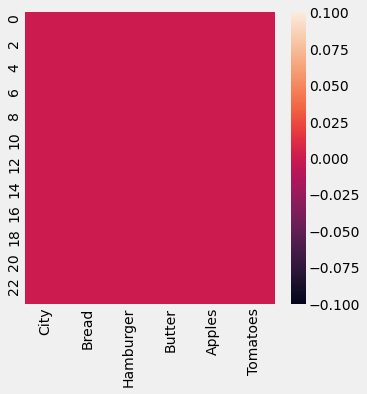

In [107]:
#Hitmap to check the null or drop columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull()) ##to visualize the missing values
df.isnull().sum()

No missing values in the dataset

In [108]:
df

,City,Bread,Hamburger,Butter,Apples,Tomatoes
0,Anchorage,70.9,135.6,155.00,63.9,100.1
1,Atlanta,36.4,111.5,144.30,53.9,95.9
2,Baltimore,28.9,108.8,151.00,47.5,104.5
3,Boston,43.2,119.3,142.00,41.1,96.5
4,Buffalo,34.5,109.9,124.80,35.6,75.9
5,Chicago,37.1,107.5,145.40,65.1,94.2
6,Cincinnati,37.1,118.1,149.60,45.6,90.8
7,Cleveland,38.5,107.7,142.70,50.3,83.2
8,Dallas,35.5,116.8,142.50,62.4,90.7
9,Detroit,40.8,108.8,140.10,39.7,96.1


In [109]:
# Checking data types 
df.dtypes

City          object
Bread        float64
Hamburger    float64
Butter       float64
Apples       float64
Tomatoes     float64
dtype: object

In [110]:
df.describe()

,Bread,Hamburger,Butter,Apples,Tomatoes
count,24.000000,24.000000,24.000000,24.0000,24.000000
mean,38.441667,112.245833,144.212917,51.7375,89.758333
std,8.366544,11.633160,9.226894,8.3590,7.398879
min,28.900000,84.500000,123.200000,35.6000,75.900000
25%,34.200000,106.975000,139.775000,46.4250,84.175000
50%,36.900000,109.850000,143.500000,51.1000,89.900000
75%,40.200000,117.125000,150.475000,58.0750,94.625000
max,70.900000,135.600000,162.300000,65.1000,104.500000


Couple of observations :


*   There are 24 counts in each variable bread,hamburger, Butter etc.
*   Min Price of Bread is 24.90 with max 70.90, similarly we can notice for other variables too
*   Butter has the max price 162.30 and Bread the lowest 28.90
*   We can also notice how the 75% of the dataset or variable priced from the above.





In [111]:
len(df)

24

Obviously we have 24 rows

In [112]:
len(df.columns)

6

We have 6 columns in the dataframe

Later we would create PCA model to identy important columns counts

In [113]:
#lets separate the x and y variables
y=df['City']
x=df.drop("City",axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=42)

Use PCA

In [115]:
#STEP 1: We will normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)##calculate mean/std deviation from training data
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [116]:
x_train_scaled

array([[ 0.61569885, -0.60637533, -0.45406251,  1.01317082, -0.93484912],
       [ 0.07257287, -0.33294661,  0.15368548,  1.74438891,  0.69040094],
       [-1.46316267, -0.21037512,  0.69390591, -0.43687182,  2.05138271],
       [-0.30199677, -1.05894701,  1.78399357, -1.04415464, -0.14204421],
       [-0.78893731,  0.53448244, -0.83993425, -0.37490419,  0.01651677],
       [ 1.21501028,  0.77962543, -0.1743055 , -1.23005754,  0.99430949],
       [-0.41436767, -0.10666077, -1.83355397, -1.91170152, -1.72765404],
       [-0.84512276, -0.53094672, -0.67593876,  0.36870742, -0.04955031],
       [ 1.15882483,  1.49619725,  0.96401613,  0.10844336,  1.65498025],
       [-0.78893731, -2.50151923,  0.20191945, -0.31293655, -0.88199546],
       [-0.92003669,  0.53448244,  1.06144874,  0.81487439, -0.31381861],
       [ 0.33477162, -0.31408946, -0.10677794, -0.08985307, -0.76307473],
       [ 2.65710341,  1.94876892,  1.02189689,  1.73199538,  0.6507607 ],
       [-0.63910945, -0.18208939, -1.9

In [117]:
x_test_scaled

array([[-0.22708285,  0.54391101, -0.12607153,  1.40976368,  0.22793141],
       [ 1.12136787,  1.86391173,  0.47202966, -0.4244783 ,  0.41291922],
       [ 6.40279984,  2.31648341,  1.07977765,  1.59566659,  1.46999244],
       [ 0.0351159 ,  0.41191094, -0.4733561 , -0.89543232,  0.38649239],
       [-0.30199677, -0.82323259,  0.62637836,  1.02556435, -0.59130033],
       [ 0.76552671, -0.21037512, -0.35759457, -1.40356692,  0.94145583],
       [ 0.0351159 , -1.39837577, -0.32865419,  0.45546211, -1.27839792],
       [-0.05852651,  0.04419645,  0.04757075,  0.3563139 ,  0.915029  ]])

1.1 Create a PCA model and identify the first 2 principal components

In [118]:
#step 2: get the PCA model
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Now we can transform this data to its first 2 principal components.
x_pca=pca.fit(x_train_scaled)##finding the new axis from training data
x_train_scaled_pca=pca.transform(x_train_scaled)##using new axis to represent data
x_test_scaled_pca=pca.transform(x_test_scaled)

##see how much variance is explained
pca.explained_variance_ratio_

array([0.4436444 , 0.20726417])

In [119]:
x_train_scaled_pca.shape

(16, 2)

In [120]:
x_test_scaled_pca.shape

(8, 2)

1.2 Print the eigenvalues and loadings.

In [121]:
##eigen vectors/loadings
len(pca.components_[1])

###eigen values
eigenvalues = pca.explained_variance_
###loadings
import numpy as np
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print(eigenvalues)
print(loadings)

[2.36610345 1.10540892]
[[ 0.75063147 -0.49457017]
 [ 0.80874801 -0.34120644]
 [ 0.59540124  0.67083884]
 [ 0.50218644 -0.22816784]
 [ 0.73613086  0.49224194]]


1.3 Describe how much PC1 and PC2 explain the variance in the data

In [122]:
##see how much variance is explained
print("\nExplained by PCA: ", pca.explained_variance_ratio_)


Explained by PCA:  [0.4436444  0.20726417]


So, 44.36% variance is explained by PC1 and 20.73% variance is explained by PC2

1.4 By writing a code similar to the following, generate a graph


I have created 3 graphs with train test split and without just to see the difference

In [129]:
#without train test split checking the plot
scaler = StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
pca = PCA(n_components=2)
pca.fit(x_scaled)
x_scaled_pca=pca.transform(x_scaled)

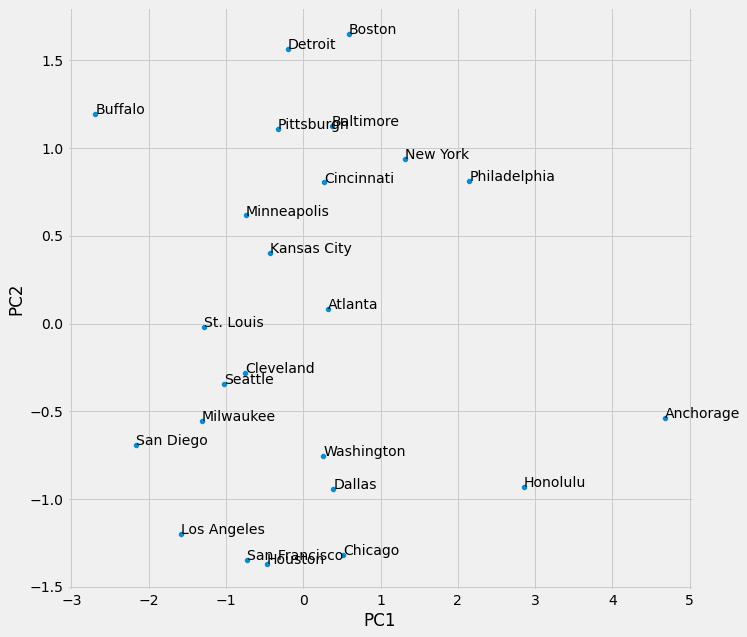

In [130]:
scaled_x_pca=pd.DataFrame(x_scaled_pca,columns=["PC1","PC2"])
total_set=pd.concat([scaled_x_pca,df],axis=1)
plt.figure(figsize=(10,10))
sns.scatterplot(x="PC1",y="PC2",data=total_set)
for i in range(len(total_set)):
    plt.text(total_set.loc[i,"PC1"],total_set.loc[i,"PC2"],total_set.loc[i,"City"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


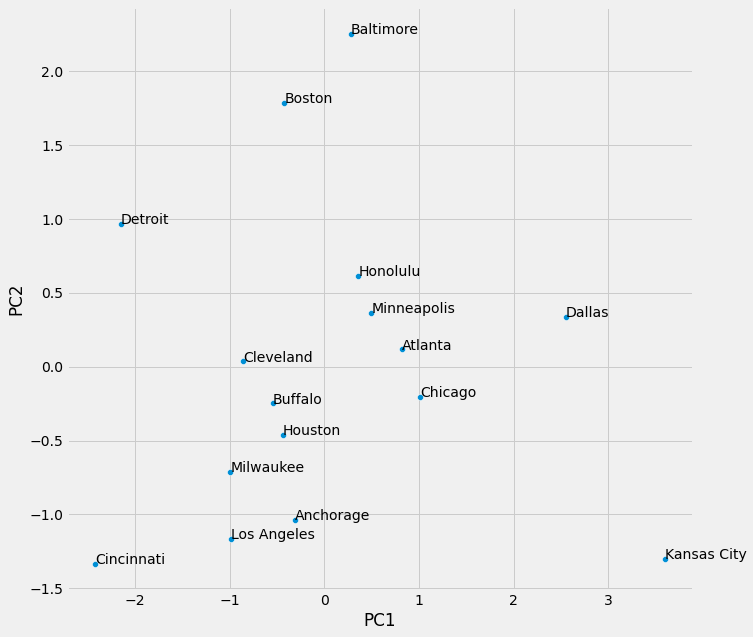

In [127]:
scaled_x_pca=pd.DataFrame(x_train_scaled_pca,columns=["PC1","PC2"])
total_set=pd.concat([scaled_x_pca,df],axis=1)
plt.figure(figsize=(10,10))
sns.scatterplot(x="PC1",y="PC2",data=total_set)
for i in range(len(total_set)):
    plt.text(total_set.loc[i,"PC1"],total_set.loc[i,"PC2"],total_set.loc[i,"City"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

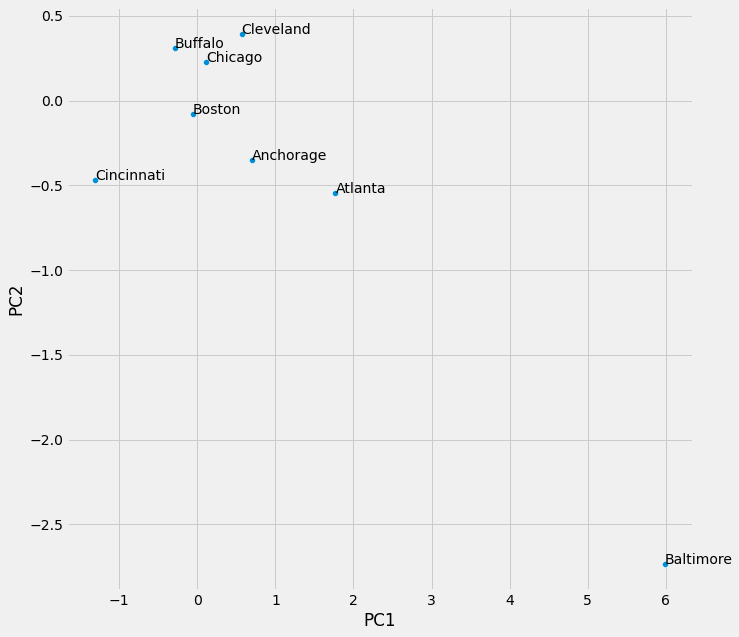

In [126]:
scaled_x_pca=pd.DataFrame(x_test_scaled_pca,columns=["PC1","PC2"])
total_set=pd.concat([scaled_x_pca,df],axis=1)
plt.figure(figsize=(10,10))
sns.scatterplot(x="PC1",y="PC2",data=total_set)
for i in range(len(total_set)):
    plt.text(total_set.loc[i,"PC1"],total_set.loc[i,"PC2"],total_set.loc[i,"City"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

What is the common goal of Principal Component Analysis and Confirmator Factor Analysis? How each analysis differs to achieve that goal?


Principle component analysis or PCA is a statistical procedure that allows us to summarize information content in a large dataset by means of smaller set of ‘summary indices’ that could be used easily to visualize or analyze. In other words, PCA is a linear dimensionality reduction technique that can be utilized for extracting information from a high dimensionality space by projecting it into a lower-dimensional sub-space which still contains most of the information of the large dataset.


Principal Component Analysis (PCA):
•	PCA Is a variable reduction technique
•	Is used when variables are highly correlated
•	Reduces the number of observed variables to a smaller number of principal components which account for most of the variance of the observed variables Is
•	a large sample procedure


The total amount of variance in PCA is equal to the number of observed variables being analyzed. In PCA, observed variables are standardized, e.g., mean=0, standard deviation=1, diagonals of the matrix are equal to 1. The amount of variance explained is equal to the trace of the matrix (sum of the diagonals of the decomposed correlation matrix).
The number of components extracted is equal to the number of observed variables in the analysis. The first principal component identified accounts for most of the variance in the data. The second component identified accounts for the second largest amount of variance in the data and is uncorrelated with the first principal component and so on. Components accounting for maximal variance are retained while other components accounting for a trivial amount of variance are not retained. Eigenvalues indicate the amount of variance explained by each component. Eigenvectors are the weights used to calculate components scores.


Factor analysis is a collection of methods used to examine how underlying constructs inﬂuence the responses on a number of measured variables.
There are basically two types of factor analysis: exploratory and conﬁrmatory.
Exploratory factor analysis (EFA) attempts to discover the nature of the constructs inﬂuencing a set of responses.
Conﬁrmatory factor analysis (CFA) tests whether a speciﬁed set of constructs is inﬂuencing responses in a predicted way.


Principal Component analysis makes the components that are completely orthogonal to each other whereas Factor analysis does not require such the factors to be orthogonal i.e. the correlation between these factors is non-zero.
Principal Components is primarily an exploratory technique to rationalize the number of variables in an analysis (for further causal analysis) – it may be typically used as descriptive analysis for variable selection in a propensity model where a variety of financial metric for an individual’s creditworthiness may be available.
Factor analysis, on the other hand, is approached with a prior knowledge or belief that which variables may be similar and therefore should load on a single factor. Factor analysis is thus a popular variable reduction technique in market research for measuring constructs – typically respondents are asked several questions even to measure a single construct such as ‘Perceived Usefulness of a technology like Bluetooth’ there would be several questions asked. If the respondents have answered the questions consistently, all these questions (coded as ordered variables) will load on a single factor. The factor analysis requires a modeler to specify this relationship – which variables (survey questions) to load on which factor (underlying construct).
Furthermore, in market research, it may be a case that several factors are not required to be orthogonal i.e. let us consider usefulness and ease of use that defines acceptance of a technology – usefulness measures utility and ease of use is a further qualification to usefulness. Each construct is a subjective evaluation, so perceived usefulness and perceived ease of use as two constructs are not exactly independent – the two constructs have non-zero covariance and Factor analysis allows us to model that covariance.


Differences :
Variance Part:
PCA: Principal Components retained account for a maximal amount of variance of observed variables
FA: Factors account for common variance in the data
Correlation part:
PCA: Analysis decomposes correlation matrix. Ones on the diagonals of the correlation matrix
EFA: Analysis decomposes adjusted correlation matrix. Diagonals of correlation matrix adjusted with unique factors .
Variables Part:
PCA: Minimizes sum of squared perpendicular distance to the component axis
FA: Estimates factors which influence responses on observed variables
PCA: Component scores are a linear combination of the observed variables weighted by eigenvectors
FA: Observed variables are linear combinations of the underlying and unique factors.




3. What is the difference between Linear Discriminant Analysis(LDA) and Principal Component Analysis(PCA) in dimensionality reduction?

Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels.
We can picture PCA as a technique that finds the directions of maximal variance:


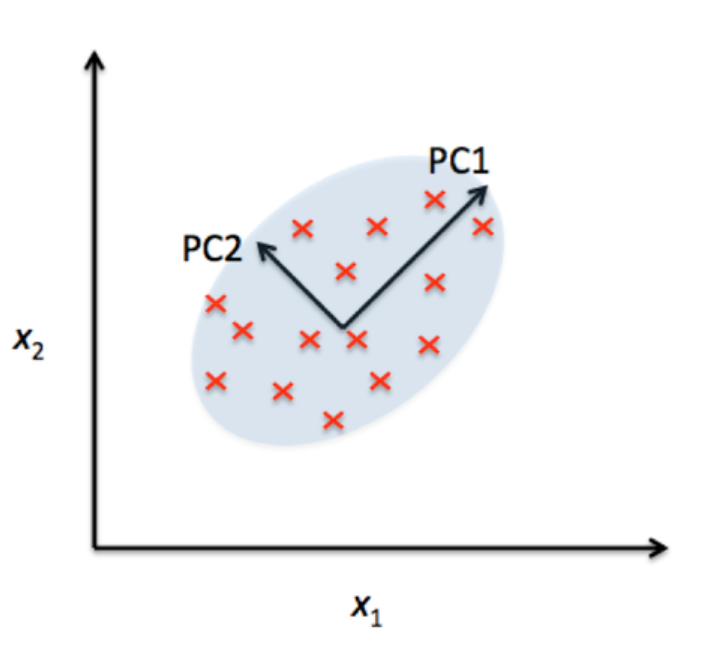

In contrast to PCA, LDA attempts to find a feature subspace that maximizes class separability.

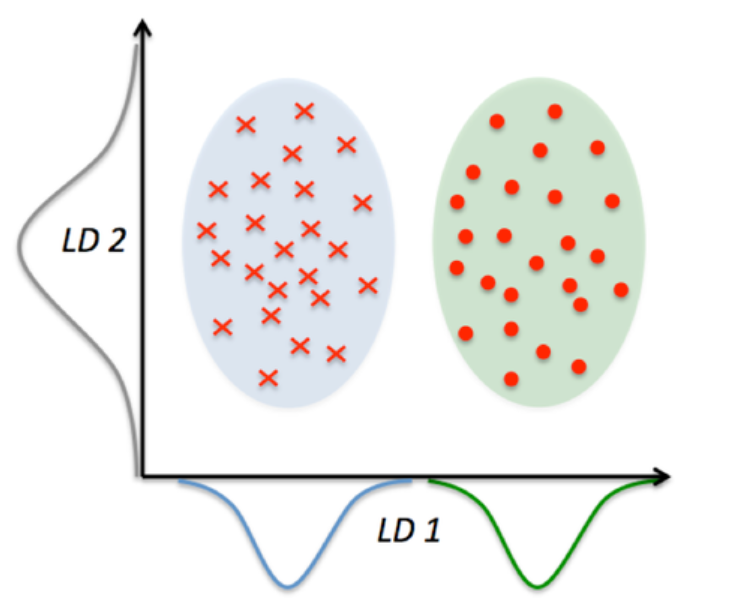

Applying PCA results into the generation of components, such that they are orthogonal and hence, highly uncorrelated with each other. Hence, also solving the problem of multicollinearity.
Though PCA reduces dimensions but when dealing with multi-class data it’s necessary to reduce dimensions in a way that inter class separation is also taken care of. LDA is an algorithm used for the same.
